In [4]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import seaborn as sns

In [3]:
df_veh = pd.read_csv('vehicles.csv')

In [4]:
df_veh.head()

,vehicle_ID,V_x,V_y,on_land
0,1,25.368490,55.487431,True
1,2,25.244684,55.483104,True
2,3,25.265855,55.461110,True
3,4,25.266825,55.494608,True
4,5,25.338874,55.510999,True


In [5]:
df_veh.shape

(4452, 4)

In [6]:
# Plotting all vehicles on a Map
BBox = ((df_veh.V_y.min(),   df_veh.V_y.max(), df_veh.V_x.min(), df_veh.V_x.max()))

In [7]:
BBox

(55.32520797, 55.5334042, 25.18652283, 25.43841972)

In [10]:
shj_map = plt.imread('Shj_Map.jpg')

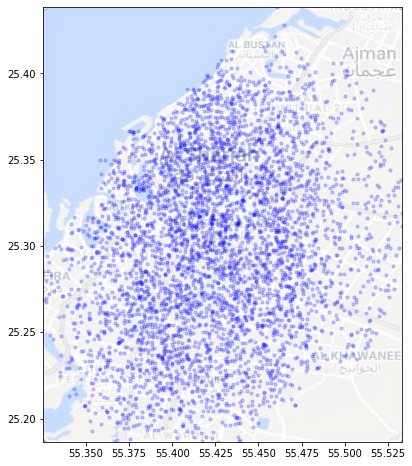

In [148]:
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(df_veh.V_y, df_veh.V_x, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(shj_map, zorder=0, extent = BBox, aspect= 'equal')
plt.savefig('allvehicles.pdf', format='pdf', dpi=1200)

In [12]:
df_veh.shape

(4452, 4)

In [13]:
df_el = pd.read_csv('elaadnl_data.csv')

In [14]:
df_el.head()

,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
0,3491779,0abf481c2d3f5866a8fc7feaae460fd0,1,8/27/2019 14:52,8/27/2019 17:58,0c24de2f8216313f75daf876ec7c2223e17c866462ae41...,3.11,3.10,9.86,3.342
1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,3/1/2019 10:14,3/1/2019 13:13,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.38,3.440
2,3469263,f4f5e5fbf8297d4889e49f10942b030b,1,7/31/2019 12:54,7/31/2019 13:21,f876668fd30216c9054a890007143b4d40d13ddd9234c7...,0.46,0.46,1.45,3.160
3,3429356,0f87094588f6330a84f30797f0458fc8,1,6/16/2019 10:55,6/16/2019 14:35,06776db669a8f444bf7f81edc7fcf6c18c51bfd90eed2f...,3.65,3.65,38.77,10.813
4,3332751,77f3b31920754dac44d2b7400f16bca3,1,3/7/2019 21:21,3/8/2019 7:22,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.14,3.884


In [15]:
df_el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionId        10000 non-null  int64  
 1   ChargePoint          10000 non-null  object 
 2   Connector            10000 non-null  int64  
 3   UTCTransactionStart  10000 non-null  object 
 4   UTCTransactionStop   10000 non-null  object 
 5   StartCard            10000 non-null  object 
 6   ConnectedTime        10000 non-null  float64
 7   ChargeTime           10000 non-null  float64
 8   TotalEnergy          10000 non-null  float64
 9   MaxPower             10000 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [18]:
df_el['UTCTransactionStart'] = pd.to_datetime(df_el['UTCTransactionStart'])

In [19]:
df_el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionId        10000 non-null  int64         
 1   ChargePoint          10000 non-null  object        
 2   Connector            10000 non-null  int64         
 3   UTCTransactionStart  10000 non-null  datetime64[ns]
 4   UTCTransactionStop   10000 non-null  object        
 5   StartCard            10000 non-null  object        
 6   ConnectedTime        10000 non-null  float64       
 7   ChargeTime           10000 non-null  float64       
 8   TotalEnergy          10000 non-null  float64       
 9   MaxPower             10000 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 781.4+ KB


In [20]:
df_el['UTCTransactionStart'].min(), df_el['UTCTransactionStart'].max()

(Timestamp('2019-01-01 00:30:00'), Timestamp('2019-12-31 21:22:00'))

In [23]:
df_el['day'] = df_el['UTCTransactionStart'].dt.date

In [38]:
df_el['date'] = pd.to_datetime(df_el['day'], format='%Y-%m-%d')

In [39]:
df_el.head()

,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,day,date
0,3491779,0abf481c2d3f5866a8fc7feaae460fd0,1,2019-08-27 14:52:00,8/27/2019 17:58,0c24de2f8216313f75daf876ec7c2223e17c866462ae41...,3.11,3.10,9.86,3.342,2019-08-27,2019-08-27
1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:00,3/1/2019 13:13,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.38,3.440,2019-03-01,2019-03-01
2,3469263,f4f5e5fbf8297d4889e49f10942b030b,1,2019-07-31 12:54:00,7/31/2019 13:21,f876668fd30216c9054a890007143b4d40d13ddd9234c7...,0.46,0.46,1.45,3.160,2019-07-31,2019-07-31
3,3429356,0f87094588f6330a84f30797f0458fc8,1,2019-06-16 10:55:00,6/16/2019 14:35,06776db669a8f444bf7f81edc7fcf6c18c51bfd90eed2f...,3.65,3.65,38.77,10.813,2019-06-16,2019-06-16
4,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:00,3/8/2019 7:22,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.14,3.884,2019-03-07,2019-03-07


In [42]:
filtered_df = df_el.loc[(df_el['date'] >= '2019-01-01')
                     & (df_el['date'] < '2019-06-30')]


In [43]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4744 entries, 1 to 9998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionId        4744 non-null   int64         
 1   ChargePoint          4744 non-null   object        
 2   Connector            4744 non-null   int64         
 3   UTCTransactionStart  4744 non-null   datetime64[ns]
 4   UTCTransactionStop   4744 non-null   object        
 5   StartCard            4744 non-null   object        
 6   ConnectedTime        4744 non-null   float64       
 7   ChargeTime           4744 non-null   float64       
 8   TotalEnergy          4744 non-null   float64       
 9   MaxPower             4744 non-null   float64       
 10  day                  4744 non-null   object        
 11  date                 4744 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 481.8+ KB


(array([3052.,  773.,  419.,  234.,   98.,   80.,   40.,   33.,   11.,
           4.]),
 array([ 0.1   ,  9.4829, 18.8658, 28.2487, 37.6316, 47.0145, 56.3974,
        65.7803, 75.1632, 84.5461, 93.929 ]),
 <BarContainer object of 10 artists>)

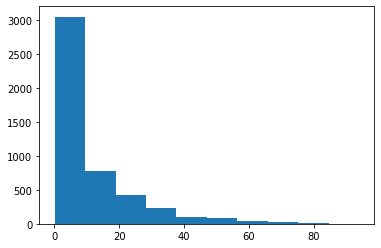

In [44]:
plt.hist(filtered_df['TotalEnergy'])

In [45]:
filtered_df.describe()

,TransactionId,Connector,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
count,4.744000e+03,4744.000000,4744.000000,4744.000000,4744.000000,4744.000000
mean,3.354397e+06,1.352234,5.513581,2.716033,12.016999,5.105624
std,5.152131e+04,0.477717,6.040009,2.422211,13.205293,3.029883
min,3.261657e+06,1.000000,0.020000,0.020000,0.100000,0.167000
25%,3.310766e+06,1.000000,1.490000,1.250000,4.280000,3.360000
50%,3.356642e+06,1.000000,3.255000,2.090000,7.150500,3.592000
75%,3.398620e+06,2.000000,8.042500,3.260000,14.522500,6.852000
max,3.442520e+06,2.000000,47.900000,21.720000,93.929000,18.000000


In [53]:
df_dem_l36 = filtered_df.query('TotalEnergy <= 36')

In [54]:
df_dem_l36.shape

(4454, 12)

In [63]:
df_dem_l36.head()

,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,day,date
1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:00,3/1/2019 13:13,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.38,3.440,2019-03-01,2019-03-01
4,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:00,3/8/2019 7:22,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.14,3.884,2019-03-07,2019-03-07
6,3320505,ca6521baf525204b44e992f14a24cee0,1,2019-02-23 04:31:00,2/23/2019 10:15,2b5425681e75679e336318e1ad1c91062b5235b649f2b2...,5.72,3.47,23.91,7.080,2019-02-23,2019-02-23
10,3378784,b3fbcba1a8c8e48f2ec3bec3f5499927,1,2019-04-21 16:59:00,4/21/2019 19:38,e46903908b80e814c00ebf8d181c7d948d34ad11e0eb91...,2.66,2.50,7.29,3.284,2019-04-21,2019-04-21
11,3372500,7f836bbb2579b6e1e5c196e599f6f7b9,1,2019-04-15 14:57:00,4/15/2019 16:41,4970f899bec8561393f189e7fccf0bf4626d647cb49538...,1.73,1.48,4.11,3.200,2019-04-15,2019-04-15


In [65]:
df_dem_l36.reset_index(inplace = True)

In [66]:
df_dem_l36

,level_0,index,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,day,date
0,0,1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:00,3/1/2019 13:13,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.380,3.440,2019-03-01,2019-03-01
1,1,4,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:00,3/8/2019 7:22,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.140,3.884,2019-03-07,2019-03-07
2,2,6,3320505,ca6521baf525204b44e992f14a24cee0,1,2019-02-23 04:31:00,2/23/2019 10:15,2b5425681e75679e336318e1ad1c91062b5235b649f2b2...,5.72,3.47,23.910,7.080,2019-02-23,2019-02-23
3,3,10,3378784,b3fbcba1a8c8e48f2ec3bec3f5499927,1,2019-04-21 16:59:00,4/21/2019 19:38,e46903908b80e814c00ebf8d181c7d948d34ad11e0eb91...,2.66,2.50,7.290,3.284,2019-04-21,2019-04-21
4,4,11,3372500,7f836bbb2579b6e1e5c196e599f6f7b9,1,2019-04-15 14:57:00,4/15/2019 16:41,4970f899bec8561393f189e7fccf0bf4626d647cb49538...,1.73,1.48,4.110,3.200,2019-04-15,2019-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,4449,9988,3279316,352c0ff8eea549082975be1dabbb5dff,1,2019-01-17 10:44:00,1/17/2019 13:04,47dbfede9dc64eb6fbc796d14acb892adb4ebd2300448e...,2.33,2.32,7.500,3.280,2019-01-17,2019-01-17
4450,4450,9989,3327086,ff6e764dafa9b43f08b8849e23304f0c,1,2019-03-01 12:00:00,3/1/2019 12:24,e09489e13f9c3015db03d6338cd4f9a71c903101ab0cde...,0.39,0.39,1.410,3.684,2019-03-01,2019-03-01
4451,4451,9991,3277618,34fe371013e9b904cb3ea5cb69671658,2,2019-01-15 18:47:00,1/16/2019 6:56,d32727c413ee3c398a908f716a6db530a33504eea31bf6...,12.15,1.75,4.391,2.800,2019-01-15,2019-01-15
4452,4452,9993,3439303,361620e756c2caa968c044429f6663a5,1,2019-06-26 16:03:00,6/27/2019 6:30,a6b1bd0d7905e5823e5759153e91cfbac926a0e9fea797...,14.46,2.75,27.110,11.003,2019-06-26,2019-06-26


In [71]:
df_dem_l36.drop(['level_0','index'],axis=1, inplace=True)
df_dem_l36

C:\Users\kccec\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower,day,date
0,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:00,3/1/2019 13:13,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.380,3.440,2019-03-01,2019-03-01
1,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:00,3/8/2019 7:22,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.140,3.884,2019-03-07,2019-03-07
2,3320505,ca6521baf525204b44e992f14a24cee0,1,2019-02-23 04:31:00,2/23/2019 10:15,2b5425681e75679e336318e1ad1c91062b5235b649f2b2...,5.72,3.47,23.910,7.080,2019-02-23,2019-02-23
3,3378784,b3fbcba1a8c8e48f2ec3bec3f5499927,1,2019-04-21 16:59:00,4/21/2019 19:38,e46903908b80e814c00ebf8d181c7d948d34ad11e0eb91...,2.66,2.50,7.290,3.284,2019-04-21,2019-04-21
4,3372500,7f836bbb2579b6e1e5c196e599f6f7b9,1,2019-04-15 14:57:00,4/15/2019 16:41,4970f899bec8561393f189e7fccf0bf4626d647cb49538...,1.73,1.48,4.110,3.200,2019-04-15,2019-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...
4449,3279316,352c0ff8eea549082975be1dabbb5dff,1,2019-01-17 10:44:00,1/17/2019 13:04,47dbfede9dc64eb6fbc796d14acb892adb4ebd2300448e...,2.33,2.32,7.500,3.280,2019-01-17,2019-01-17
4450,3327086,ff6e764dafa9b43f08b8849e23304f0c,1,2019-03-01 12:00:00,3/1/2019 12:24,e09489e13f9c3015db03d6338cd4f9a71c903101ab0cde...,0.39,0.39,1.410,3.684,2019-03-01,2019-03-01
4451,3277618,34fe371013e9b904cb3ea5cb69671658,2,2019-01-15 18:47:00,1/16/2019 6:56,d32727c413ee3c398a908f716a6db530a33504eea31bf6...,12.15,1.75,4.391,2.800,2019-01-15,2019-01-15
4452,3439303,361620e756c2caa968c044429f6663a5,1,2019-06-26 16:03:00,6/27/2019 6:30,a6b1bd0d7905e5823e5759153e91cfbac926a0e9fea797...,14.46,2.75,27.110,11.003,2019-06-26,2019-06-26


In [75]:
df_veh.shape

(4452, 4)

In [76]:
df_dem_l36.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionId        4454 non-null   int64         
 1   ChargePoint          4454 non-null   object        
 2   Connector            4454 non-null   int64         
 3   UTCTransactionStart  4454 non-null   datetime64[ns]
 4   UTCTransactionStop   4454 non-null   object        
 5   StartCard            4454 non-null   object        
 6   ConnectedTime        4454 non-null   float64       
 7   ChargeTime           4454 non-null   float64       
 8   TotalEnergy          4454 non-null   float64       
 9   MaxPower             4454 non-null   float64       
 10  day                  4454 non-null   object        
 11  date                 4454 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 417.7+ KB


(array([ 981., 1441.,  814.,  314.,  229.,  186.,  152.,  152.,  116.,
          69.]),
 array([ 0.1  ,  3.689,  7.278, 10.867, 14.456, 18.045, 21.634, 25.223,
        28.812, 32.401, 35.99 ]),
 <BarContainer object of 10 artists>)

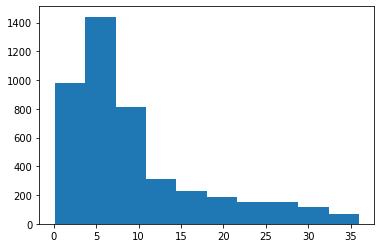

In [77]:
plt.hist(df_dem_l36['TotalEnergy'])

In [78]:
df_veh['Demand'] = df_dem_l36['TotalEnergy']

In [79]:
df_veh

,vehicle_ID,V_x,V_y,on_land,Demand
0,1,25.368490,55.487431,True,9.380
1,2,25.244684,55.483104,True,26.140
2,3,25.265855,55.461110,True,23.910
3,4,25.266825,55.494608,True,7.290
4,5,25.338874,55.510999,True,4.110
...,...,...,...,...,...
4447,4996,25.350328,55.431043,True,8.610
4448,4997,25.333792,55.465653,True,5.580
4449,4998,25.354721,55.446572,True,7.500
4450,4999,25.253099,55.439867,True,1.410


(array([ 981., 1441.,  814.,  313.,  229.,  186.,  152.,  151.,  116.,
          69.]),
 array([ 0.1  ,  3.689,  7.278, 10.867, 14.456, 18.045, 21.634, 25.223,
        28.812, 32.401, 35.99 ]),
 <BarContainer object of 10 artists>)

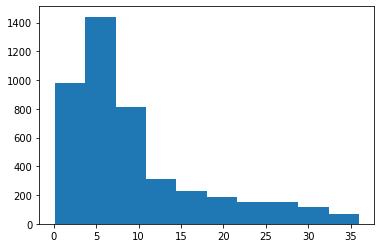

In [80]:
plt.hist(df_veh['Demand'])

In [81]:
df_veh['RemMileage'] = 300*(40-df_veh['Demand'])/40

In [82]:
df_veh.describe()

,vehicle_ID,V_x,V_y,Demand,RemMileage
count,4452.000000,4452.000000,4452.000000,4452.000000,4452.000000
mean,2379.328167,25.299193,55.425954,9.396237,229.528223
std,1457.828526,0.050349,0.040198,7.994068,59.955511
min,1.000000,25.186523,55.325208,0.100000,30.075000
25%,1114.750000,25.261340,55.397077,4.077500,211.425000
50%,2252.500000,25.299819,55.425039,6.810000,248.925000
75%,3662.250000,25.337931,55.454749,11.810000,269.418750
max,5000.000000,25.438420,55.533404,35.990000,299.250000


In [83]:
df_veh.shape

(4452, 6)

In [84]:
df_veh_demand = df_veh

In [85]:
df_veh_demand.drop(['vehicle_ID'],1,inplace=True)

In [86]:
df_veh_demand.head()

,V_x,V_y,on_land,Demand,RemMileage
0,25.368490,55.487431,True,9.38,229.650
1,25.244684,55.483104,True,26.14,103.950
2,25.265855,55.461110,True,23.91,120.675
3,25.266825,55.494608,True,7.29,245.325
4,25.338874,55.510999,True,4.11,269.175


In [87]:
df_veh_demand.drop(['on_land'],1,inplace=True)

In [90]:
v_id = []
for i in range(1,df_veh_demand.shape[0]+1):
    v_id.append('v{}'.format(i))
df_veh_demand['vehicle_ID'] = v_id

In [92]:
df_veh_demand.head()

,V_x,V_y,Demand,RemMileage,vehicle_ID
0,25.368490,55.487431,9.38,229.650,v1
1,25.244684,55.483104,26.14,103.950,v2
2,25.265855,55.461110,23.91,120.675,v3
3,25.266825,55.494608,7.29,245.325,v4
4,25.338874,55.510999,4.11,269.175,v5


In [91]:
df_veh_demand.describe()

,V_x,V_y,Demand,RemMileage
count,4452.000000,4452.000000,4452.000000,4452.000000
mean,25.299193,55.425954,9.396237,229.528223
std,0.050349,0.040198,7.994068,59.955511
min,25.186523,55.325208,0.100000,30.075000
25%,25.261340,55.397077,4.077500,211.425000
50%,25.299819,55.425039,6.810000,248.925000
75%,25.337931,55.454749,11.810000,269.418750
max,25.438420,55.533404,35.990000,299.250000


In [93]:
df_veh_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4452 entries, 0 to 4451
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V_x         4452 non-null   float64
 1   V_y         4452 non-null   float64
 2   Demand      4452 non-null   float64
 3   RemMileage  4452 non-null   float64
 4   vehicle_ID  4452 non-null   object 
dtypes: float64(4), object(1)
memory usage: 174.0+ KB


In [95]:
df_veh_demand.rename(columns = {'Demand':'E_i', 'RemMileage':'m_i'}, inplace=True)

In [96]:
df_veh_demand['u_i'] = 50

In [98]:
df_veh_demand.head()

,V_x,V_y,E_i,m_i,vehicle_ID,u_i
0,25.368490,55.487431,9.38,229.650,v1,50
1,25.244684,55.483104,26.14,103.950,v2,50
2,25.265855,55.461110,23.91,120.675,v3,50
3,25.266825,55.494608,7.29,245.325,v4,50
4,25.338874,55.510999,4.11,269.175,v5,50


In [99]:
df_veh_demand = df_veh_demand[['vehicle_ID', 'V_x','V_y','E_i','m_i','u_i']]

In [100]:
df_veh_demand.head()

,vehicle_ID,V_x,V_y,E_i,m_i,u_i
0,v1,25.368490,55.487431,9.38,229.650,50
1,v2,25.244684,55.483104,26.14,103.950,50
2,v3,25.265855,55.461110,23.91,120.675,50
3,v4,25.266825,55.494608,7.29,245.325,50
4,v5,25.338874,55.510999,4.11,269.175,50


In [101]:
df_veh_demand.to_csv('vehicle_demand.csv', index=False)

In [153]:
for i in range(2):
    sample = df_veh_demand.sample(200, replace = False)
    sample.reset_index(inplace = True)
    sample.drop(['index'],1, inplace=True)
    sample.to_csv('sample{}_nr.csv'.format(i), index=False)

In [103]:
df = pd.read_csv('sample0.csv')

In [104]:
df.head()

,vehicle_ID,V_x,V_y,E_i,m_i,u_i
0,v3766,25.256806,55.383456,5.640,257.7000,50
1,v221,25.367717,55.477140,3.740,271.9500,50
2,v1804,25.275642,55.393801,14.379,192.1575,50
3,v2392,25.330135,55.392482,6.630,250.2750,50
4,v4338,25.310773,55.469746,7.450,244.1250,50


(array([54., 61., 33., 15., 13.,  5.,  7.,  4.,  3.,  5.]),
 array([ 0.18  ,  3.7491,  7.3182, 10.8873, 14.4564, 18.0255, 21.5946,
        25.1637, 28.7328, 32.3019, 35.871 ]),
 <BarContainer object of 10 artists>)

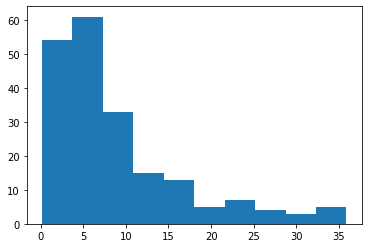

In [105]:
plt.hist(df['E_i'])

In [106]:
df_lanes = pd.read_csv('lanes.csv')

In [107]:
df_lanes.head()

,Lane_ID,L_x,L_y
0,1,25.317698,55.488839
1,2,25.298846,55.454846
2,3,25.298403,55.438383
3,4,25.286199,55.427122
4,5,25.297760,55.396421


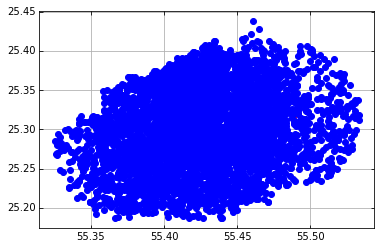

<Figure size 432x288 with 0 Axes>

In [139]:
fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)

ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.grid()
plt.show()
plt.savefig('sample0_data.pdf', format='pdf', dpi=1200)

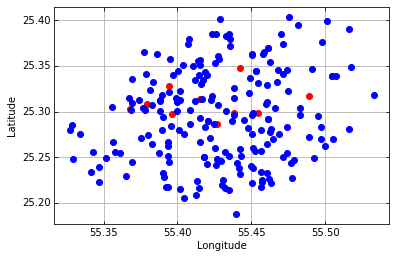

In [142]:
df = pd.read_csv('sample1.csv')

fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)
ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('sample1_data.pdf', format='pdf', dpi=1200)
plt.show()

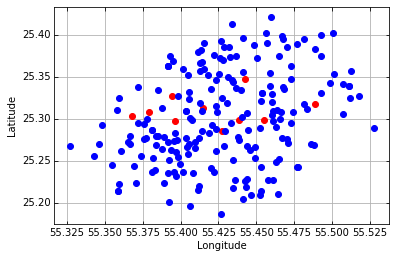

In [144]:
df = pd.read_csv('sample2.csv')

fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)
ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('sample2_data.pdf', format='pdf', dpi=1200)
plt.show()

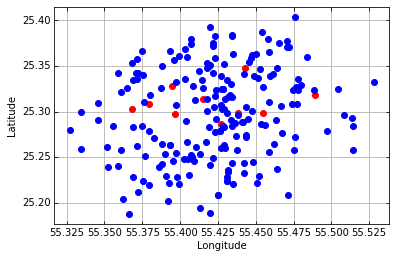

In [145]:
df = pd.read_csv('sample3.csv')

fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)
ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('sample3_data.pdf', format='pdf',dpi=1200)
plt.show()

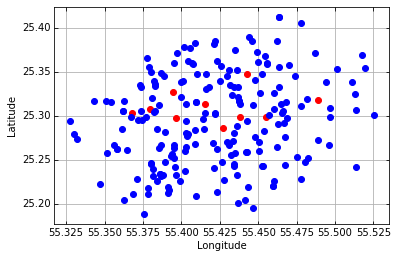

In [146]:
df = pd.read_csv('sample4.csv')

fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)
ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('sample4_data.pdf', format='pdf',dpi=1200)
plt.show()

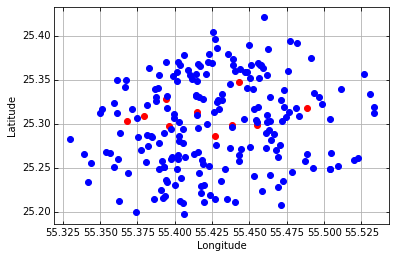

In [154]:
df = pd.read_csv('sample1_nr.csv')

fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)
ax.set_autoscale_on(True)
ax.plot(df_lanes.L_y, df_lanes.L_x, 'ro')
ax.plot(df.V_y, df.V_x, 'bo')
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('sample1_nr_data.pdf', format='pdf',dpi=1200)
plt.show()

In [118]:
import seaborn as sns

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


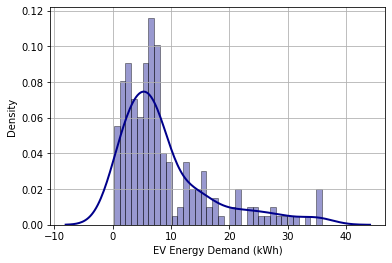

<Figure size 432x288 with 0 Axes>

In [120]:
df = pd.read_csv('sample0.csv')

sns.distplot(df['E_i'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.show()
plt.savefig('sample0_dist.eps', format='eps')

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


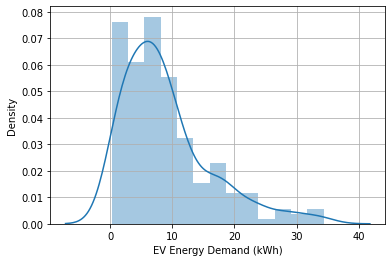

In [152]:
df = pd.read_csv('sample1.csv')

sns.distplot(df['E_i'], kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.savefig('sample1_dist.pdf', format='pdf',dpi=1200)
plt.show()

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


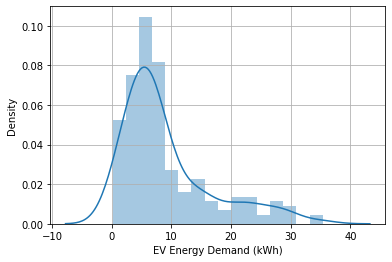

In [151]:
df = pd.read_csv('sample2.csv')

sns.distplot(df['E_i'], kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.savefig('sample2_dist.pdf', format='pdf',dpi=1200)
plt.show()

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


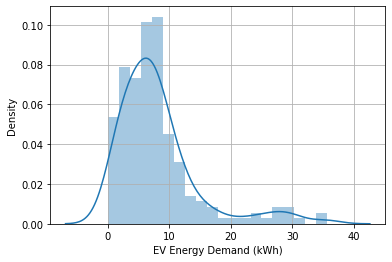

In [150]:
df = pd.read_csv('sample3.csv')

sns.distplot(df['E_i'], kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.savefig('sample3_dist.pdf', format='pdf', dpi=1200)
plt.show()

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


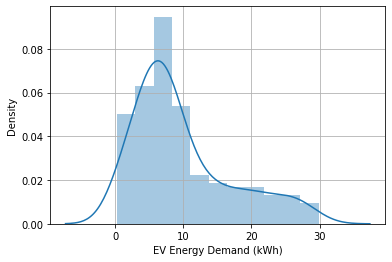

In [149]:
df = pd.read_csv('sample4.csv')

sns.distplot(df['E_i'], kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.savefig('sample4_dist.pdf', format='pdf', dpi=1200)
plt.show()

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


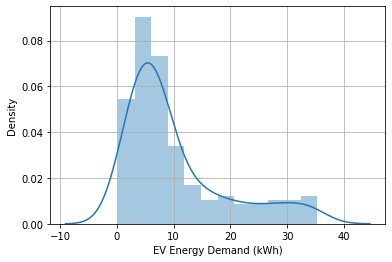

In [155]:
df = pd.read_csv('sample1_nr.csv')

sns.distplot(df['E_i'], kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.grid()
plt.savefig('sample1_nr_dist.pdf', format='pdf', dpi=1200)
plt.show()

C:\Users\kccec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


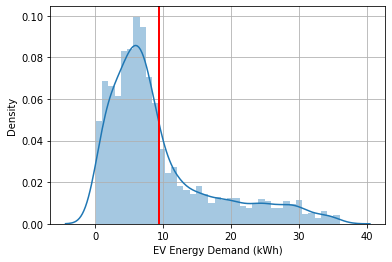

In [7]:
df = pd.read_csv('vehicle_demand.csv')

sns.distplot(df['E_i'],
             kde_kws={'linewidth': 1.5})
plt.xlabel('EV Energy Demand (kWh)')
plt.axvline(x=df['E_i'].mean(), color='r', linewidth=2);
plt.grid()
plt.savefig('Allvehicles_dist.pdf', format='pdf', dpi=1200)
plt.show()

In [6]:
df['E_i'].mean()

9.39623697214735